In [2]:
import numpy as np
import pandas as pd
import math
from scipy.stats import *
import scipy as sp
import matplotlib.pyplot as plt

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한
%precision 3

# Dataframe의 출력을 소수점 이하 3자리로 제한
pd.set_option('precision', 3)

# 여러 변수 출력 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
from matplotlib import font_manager, rc
font_path = "C:\Windows\Fonts\malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [4]:
data1 = pd.read_csv('./data/도로교통공단_어린이 교통사고 현황_20191231.csv', encoding='cp949')
data2 = pd.read_csv('./data/도로교통공단_어린이 사망교통사고 정보_20191231.csv', encoding='cp949')

In [5]:
data_a = data1.copy()
data_a

,발생일,발생시간,주야,요일,사망자수,중상자수,경상자수,부상신고자수,발생지_시도,발생지_시군구,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별
0,2015-01-01,1,야,목,0,1,0,0,경기,의왕시,차대사람,횡단중,횡단중,신호위반,단일로,횡단보도상,승용차,보행자
1,2015-01-01,1,야,목,0,0,2,0,경북,구미시,차대차,측면충돌,측면충돌,안전운전 의무 불이행,단일로,기타단일로,승용차,승용차
2,2015-01-01,2,야,목,0,0,2,0,강원,고성군,차대차,추돌,진행중 추돌,안전운전 의무 불이행,단일로,기타단일로,승합차,승용차
3,2015-01-01,9,주,목,0,1,0,0,충남,예산군,차대차,기타,기타,안전운전 의무 불이행,교차로,교차로내,승용차,승용차
4,2015-01-01,9,주,목,0,0,1,0,전남,나주시,차대차,측면충돌,측면충돌,안전운전 의무 불이행,단일로,기타단일로,승용차,승용차
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55473,2019-12-31,19,야,화,0,0,3,0,서울,구로구,차대차,측면충돌,측면충돌,안전거리 미확보,단일로,기타단일로,승용차,승용차
55474,2019-12-31,20,야,화,0,0,2,0,전남,보성군,차대차,추돌,추돌,안전운전 의무 불이행,단일로,기타단일로,승용차,승용차
55475,2019-12-31,21,야,화,0,0,2,0,충북,청주시,차대차,기타,기타,안전운전 의무 불이행,단일로,기타단일로,이륜차,승용차
55476,2019-12-31,22,야,화,0,0,1,0,경기,수원시,차대차,추돌,추돌,안전거리 미확보,단일로,기타단일로,이륜차,승용차


In [6]:
data_a = data_a[data_a['발생지_시도']=='서울']
data_a=data_a[data_a['사고유형_대분류']=='차대사람']
total = int(data_a['발생일'].count())
total

3188

In [7]:
# data_b=data_a[data_a['사고유형']=='횡단중']
# data_b['발생일'].count()

In [8]:
# 횡단보도
road_style=['교차로횡단보도내', '횡단보도부근', '횡단보도상']

data_c = data_a.copy()

data_crossroads = []
for i in road_style:
    data_cross=data_c[data_c['도로형태'] == i]
    a = data_cross['발생일'].count()
    data_crossroads.append(a)
data_crossroads

[263, 22, 191]

In [9]:
crossroads = int(sum(data_crossroads))
crossroads

476

In [10]:
# 고가도로위 사고수
data_d = data_a.copy()
data_d = data_d[data_d['도로형태'] == '고가도로위']
goga=int(data_d['발생일'].count())
goga

3

In [11]:
# 교량위
data_e = data_a.copy()
data_e = data_e[data_e['도로형태']=='교량위']
bridge = int(data_e['발생일'].count())
bridge

4

In [12]:
# 기타단일로
data_f = data_a.copy()
data_f = data_f[data_f['도로형태']=='기타단일로']
singleroad = int(data_f['발생일'].count())
singleroad

1685

In [13]:
# 지하차도(도로)내
data_g = data_a.copy()
data_g = data_g[data_g['도로형태']=='지하차도(도로)내']
underpass = int(data_g['발생일'].count())
underpass

9

In [14]:
# 교차로내, 교차로부근 묶기 : intersection
data_h = data_a.copy()
inter_list=['교차로내', '교차로부근']
intersection = []
for inter in inter_list:
    data_inters=data_h[data_h['도로형태'] == inter]
    intersection.append(data_inters['발생일'].count())
intersections = int(sum(intersection))
intersections

821

In [15]:
# 기타, 기타/불명, 불명 묶어서 건수 나타내기 : etcs
data_i = data_a.copy()
etc_list=['기타', '기타/불명', '불명']
etcroad = []
for etc in etc_list:
    data_etcs=data_i[data_i['도로형태'] == etc]
    etcroad.append(data_etcs['발생일'].count())
etcroads = int(sum(etcroad))
etcroads

190

<Figure size 360x360 with 0 Axes>

([<matplotlib.patches.Wedge at 0x155acf19910>,
 [Text(1.0703863929681896, 0.542469326090009, '횡단보도'),
  Text(0.6477908775611465, 0.8890258595499683, '고가도로'),
  Text(0.6416429231745718, 0.893473200012172, '교량'),
  Text(-0.9495418363609588, 0.555310994849065, '기타단일로'),
  Text(-0.45919628434267157, -0.9995692934688843, '지하차도(도로)'),
  Text(0.4154376204620137, -1.0185340364979758, '교차로'),
  Text(1.0807751392618596, -0.20475619246681645, '기타')],
 [Text(0.6243920625647772, 0.31644044021917184, '14.9%'),
  Text(0.35334047866971624, 0.4849231961181645, '0.1%'),
  Text(0.3499870490043119, 0.4873490181884574, '0.1%'),
  Text(-0.5179319107423411, 0.3028969062813081, '52.9%'),
  Text(-0.2504707005505481, -0.5452196146193914, '0.3%'),
  Text(0.22660233843382563, -0.5555640199079868, '25.8%'),
  Text(0.5895137123246507, -0.11168519589099078, '6.0%')])

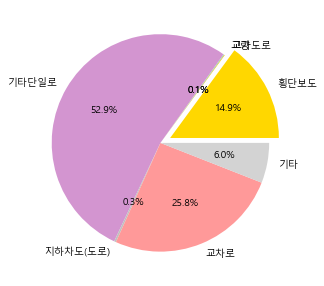

In [16]:
result = [crossroads, goga, bridge, singleroad, underpass, intersections, etcroads]
roadType = '횡단보도', '고가도로', '교량', '기타단일로', '지하차도(도로)', '교차로', '기타'
colors = ['gold', '#ffc000', '#8fd9b6', '#d395d0', 'silver', '#ff9999', 'lightgray']
explode = [0.1, 0, 0, 0, 0, 0, 0]
plt.figure(figsize=(5,5))
plt.pie(result,labels=roadType, autopct='%.1f%%', colors=colors, explode=explode)
plt.show()

<Figure size 360x360 with 0 Axes>

([<matplotlib.patches.Wedge at 0x155ae44d580>,
 [Text(0.6534616943450918, 1.0064729574229214, '횡단보도'),
  Text(-0.4539122135573937, 1.0019798912071176, '고가도로'),
  Text(-0.46852357560938135, 0.9952314600625326, '교량'),
  Text(-0.4953905054170982, 0.9821345361724085, '지하차도(도로)'),
  Text(-0.8880228624705616, -0.6491651528922283, '교차로'),
  Text(1.0143877292701404, -0.4254615549096869, '기타')],
 [Text(0.38118598836797024, 0.5871092251633708, '31.7%'),
  Text(-0.2475884801222147, 0.5465344861129732, '0.2%'),
  Text(-0.25555831396875345, 0.5428535236704722, '0.3%'),
  Text(-0.2702130029547808, 0.5357097470031319, '0.6%'),
  Text(-0.48437610680212445, -0.35409008339576087, '54.6%'),
  Text(0.5533023977837129, -0.23206993904164738, '12.6%')])

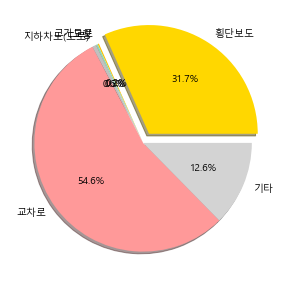

In [17]:
result = [crossroads, goga, bridge, underpass, intersections, etcroads]
roadType = '횡단보도', '고가도로', '교량', '지하차도(도로)', '교차로', '기타'
colors = ['gold', '#ffc000', '#8fd9b6', 'silver', '#ff9999', 'lightgray']
explode = [0.1, 0, 0, 0, 0, 0]
plt.figure(figsize=(5,5))
plt.pie(result,labels=roadType, autopct='%.1f%%', colors=colors, explode=explode, shadow=True)
plt.show()